In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')
config['augmentations']['pad_trunc_noise_multiplier']


In [ ]:
from torchsummary import summary
summary(model, (1,257, 63))

In [ ]:
import torch
from loader.AudioDataset import specMask, collate_batch, createDataset
from torch.utils.data import Dataset
import loader.utils as utils
import matplotlib.pyplot as plt
import model
import random

random.seed(10)
torch.manual_seed(10)

linux = '/media/jianquan/Data/Processed Audio/'
windows = 'E:/Processed Audio/'

audio_paths, _ = utils.getAudioPaths(windows)

audio_train_dataset = createDataset(audio_paths, transformParams = utils.getTransforms(False), outputAudio = True)

test_dataloader = torch.utils.data.DataLoader(
    audio_train_dataset,
    batch_size=1,
    num_workers=0,
    shuffle=False,
    collate_fn = collate_batch
)
batch = next(iter(test_dataloader))
batch_size = len(batch[0])

nfftList = [64, 128, 256, 512, 1024]
classList = [0, 1, 2]

for nfft in nfftList:
    for specClass in classList:
        saveName = f'nfft{nfft}_class{specClass}'
        print(saveName, end=': ')
        testModel = model.CNNNetwork(nfft, specClass)
        testModel(batch[0])
        plt.savefig(f'./spec/spec/whisper Norm/{saveName}.png')


# import IPython.display as ipd
# ipd.Audio(batch[0][3], rate = 8000)
# for b in batch[0]:
#     # print(b.max(),b.median(),b.mean(), b.min())
#     # print(b).

    
#     plt.plot(b[0])
#     plt.show()

In [3]:
spec = torchaudio.transforms.MelSpectrogram(n_fft=512)

C:\Users\jianq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  warnings.warn(


In [145]:
import torch, torchaudio

wav, sr = torchaudio.load('./data/nspeaker_0.wav')
wav = torchaudio.functional.dcshift(wav, -wav.mean())
print(wav.max(),wav.mean(), wav.min())
wav = torchaudio.functional.gain(wav, -30 - torchaudio.functional.loudness(wav, sr))
torchaudio.functional.loudness(wav, sr)

torchaudio.save('./data/testOut1.wav', wav, sr)

tensor(0.1317) tensor(-3.7958e-11) tensor(-0.1179)


torch.Size([128, 20])
tensor(1.) tensor(0.5545) tensor(0.)


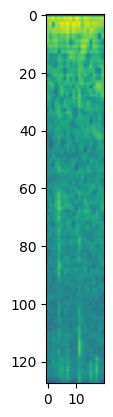

In [13]:
import torch, torchaudio
import matplotlib.pyplot as plt

def normaliseSpec(x):
        x = torch.clamp(x, min=1e-10)
        x = x.log10()
        x = torch.maximum(x, x.max() - 8.0)
        x = (x + 4.0) / 4.0
        return x

wav, sr = torchaudio.load('./data/tappingNoise.wav')
wav = torchaudio.functional.dcshift(wav, -wav.mean())
a = spec(wav)[0][:,100:120]
print(a.shape)
a=normaliseSpec(a)
a-=a.min()
a/=a.max()
print(a.max(),a.mean(), a.min())
plt.imshow(a)